In [1]:
import torch
%load_ext autoreload
%autoreload 2
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from TestingSuite import ModelsTestingSuite
from TestedModel import *
from Training.utlis import train_test_split_data
import pandas as pd
import joblib

### Loading Data

In [3]:
df = pd.read_pickle("../data/combined_df.pkl")
df["content_text_joined"] = df["content_words"].apply(lambda x: " ".join(x))
TEXT_COL = "content_text_joined"    
LABEL_COL = "is_spoiler"      

# Split
_, X, _, y = train_test_split_data(
    df,
    TEXT_COL,
    LABEL_COL
)

In [4]:
X.shape

(30000,)

In [5]:
batch_nr=30

### Initializing testing suite

In [6]:
suite=ModelsTestingSuite(X=X.to_numpy(),y=y.to_numpy())

In [7]:
tfidf_svm=joblib.load("../models/svm_tfidf.pkl")
bow_logreg=joblib.load("../models/logreg_bow.pkl")

In [8]:
suite.add(ClassicalModel(model=tfidf_svm,name="tfidf_svm"))
suite.add(ClassicalModel(model=bow_logreg,name="bow_logreg"))

In [9]:
bert_path="../Models/Bert/final_model"
bert_tokenizer = AutoTokenizer.from_pretrained(bert_path)
bert_model = AutoModelForSequenceClassification.from_pretrained(bert_path)

In [10]:
suite.add(BertModel(model=bert_model,tokenizer=bert_tokenizer,name="bert"))

In [12]:
acc_results=suite.evaluate(metric="accuracy",batch_nr=batch_nr)

batch nr 1 finished
batch nr 2 finished
batch nr 3 finished
batch nr 4 finished
batch nr 5 finished
batch nr 6 finished
batch nr 7 finished
batch nr 8 finished
batch nr 9 finished
batch nr 10 finished
batch nr 11 finished
batch nr 12 finished
batch nr 13 finished
batch nr 14 finished
batch nr 15 finished
batch nr 16 finished
batch nr 17 finished
batch nr 18 finished
batch nr 19 finished
batch nr 20 finished
batch nr 21 finished
batch nr 22 finished
batch nr 23 finished
batch nr 24 finished
batch nr 25 finished
batch nr 26 finished
batch nr 27 finished
batch nr 28 finished
batch nr 29 finished
batch nr 30 finished


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Text(0.5, 1.0, 'Accuracy comparison')

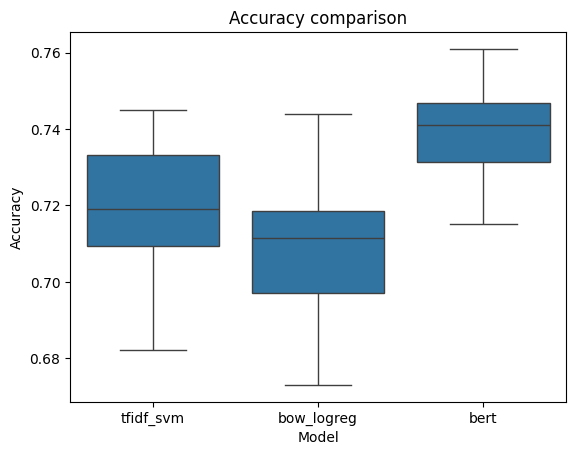

In [41]:
df=pd.DataFrame.from_dict(acc_results)
df1=df.melt().rename(columns={"value":"Accuracy","variable":"Model"})
sns.boxplot(x="Model",y="Accuracy",data=df1).set_title("Accuracy comparison")

### Performing Tests


In [13]:
suite.change_ds(X[:100].to_numpy(),y[:100].to_numpy())

In [14]:
batch_nr=10

In [15]:
time_results=suite.measure_time(batch_nr=batch_nr)

batch nr 1 finished
batch nr 2 finished
batch nr 3 finished
batch nr 4 finished
batch nr 5 finished
batch nr 6 finished
batch nr 7 finished
batch nr 8 finished
batch nr 9 finished
batch nr 10 finished


Text(0.5, 1.0, 'inference time comparison for 10 records')

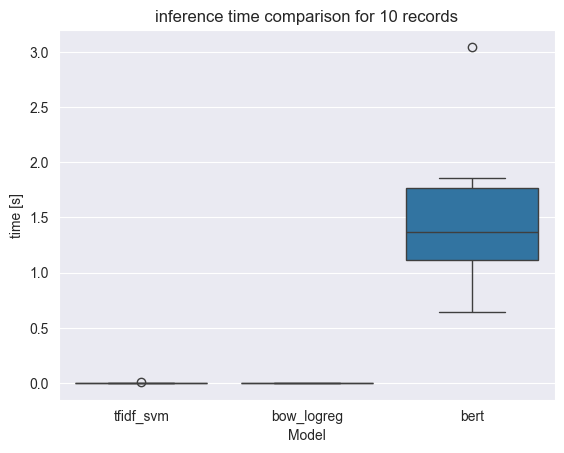

In [18]:
dft=pd.DataFrame.from_dict(time_results)
dft1=dft.melt().rename(columns={"value":"time [s]","variable":"Model"})

sns.boxplot(x="Model",y="time [s]",data=dft1).set_title(f"inference time comparison for {batch_nr} records")